## PCSE 运行的示例

PCSE（Python Crop Simulation Environment）是一个用于作物生长模拟的Python框架，它基于WOFOST（World Food Study Telescope）模型。PCSE允许用户方便地运行和定制作物生长模型，以模拟不同环境和管理条件下的作物生长。以下是PCSE的源代码和调用方法的简要介绍。

### PCSE 源代码

PCSE的源代码托管在GitHub上，可以通过以下步骤获取：

1.  安装Git（如果尚未安装）。
2.  打开命令行工具，使用以下命令克隆PCSE仓库：

bash

复制

```
git clone https://github.com/pcse/pcse.git
```

3.  克隆完成后，可以进入`pcse`目录查看源代码。

PCSE的源代码主要分为几个部分：

-   `pcse`：包含PCSE的主要代码，如模型引擎、作物参数、土壤和水管理等。
-   `examples`：提供了一些使用PCSE的示例脚本。
-   `test`：包含用于测试PCSE的代码。

### PCSE 调用方法

在开始使用PCSE之前，需要安装Python（推荐使用Anaconda发行版）以及以下依赖库：

-   numpy
-   pandas
-   pytz
-   xlrd
-   openpyxl

示例展示了如何加载站点数据、作物参数，初始化模型并运行模拟。output变量将包含模拟结果，可以进一步处理和分析。

请注意，运行PCSE模型需要根据实际情况调整站点数据和作物参数。此外，PCSE还提供了其他模型和功能，可以根据具体需求进行选择和定制。更多详细信息和示例，请参考PCSE官方文档。

Using this class from pcse.util is deprecated, use pcse.input.DummySoilDataProvider
df=                    day  DVS  LAI  TAGP  TWSO  TWLV  TWST  TWRT  TRA  RD  \
day                                                                       
2020-01-01  2020-01-01  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN NaN   
2020-01-02  2020-01-02  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN NaN   
2020-01-03  2020-01-03  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN NaN   
2020-01-04  2020-01-04  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN NaN   
2020-01-05  2020-01-05  NaN  NaN   NaN   NaN   NaN   NaN   NaN  NaN NaN   

                  SM  WBOT IRRIG  TOTIRR  
day                                       
2020-01-01  0.400000  None  None     0.0  
2020-01-02  0.300000  None  None     0.0  
2020-01-03  0.301903  None  None     0.0  
2020-01-04  0.338000  None  None     0.0  
2020-01-05  0.306000  None  None     0.0  


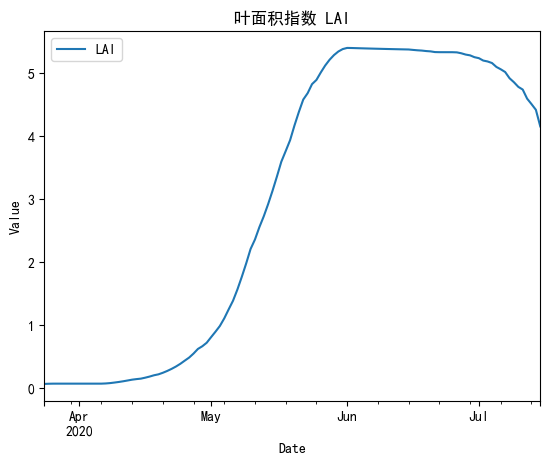

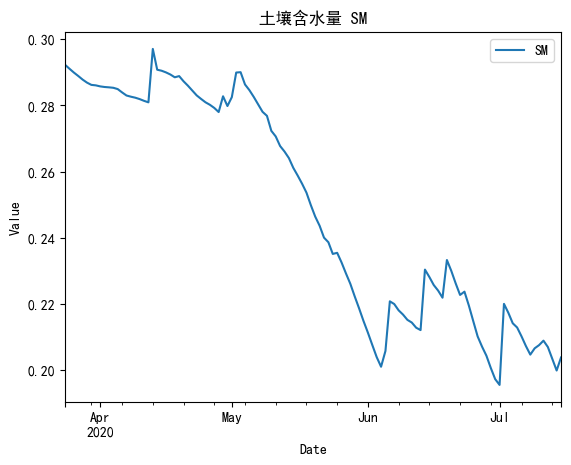

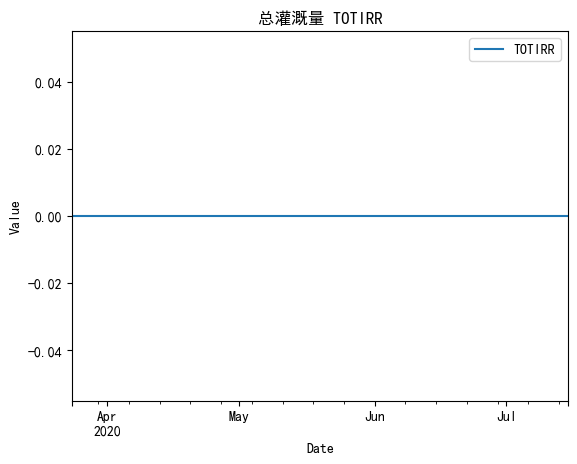

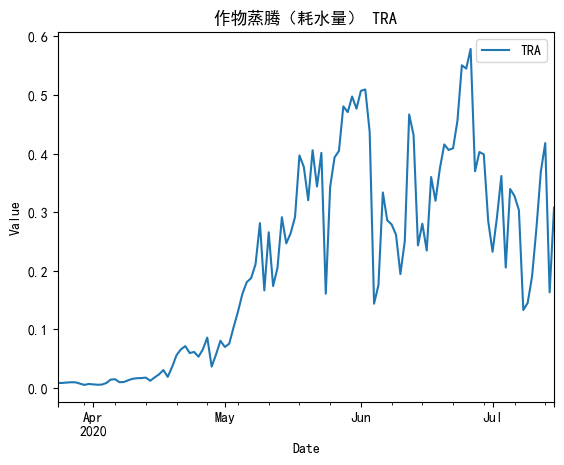

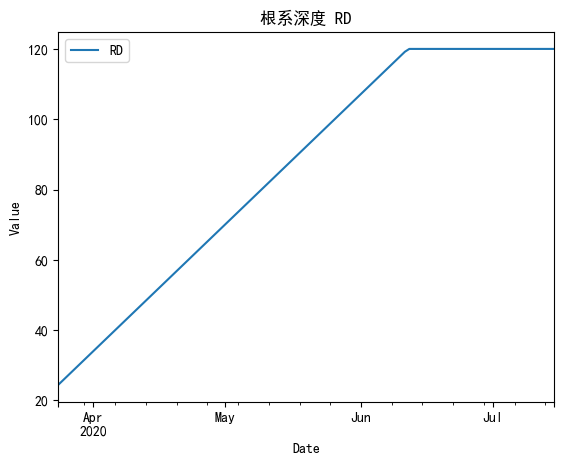

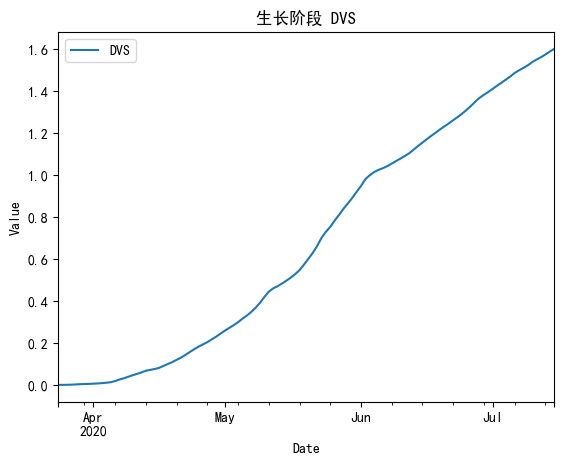

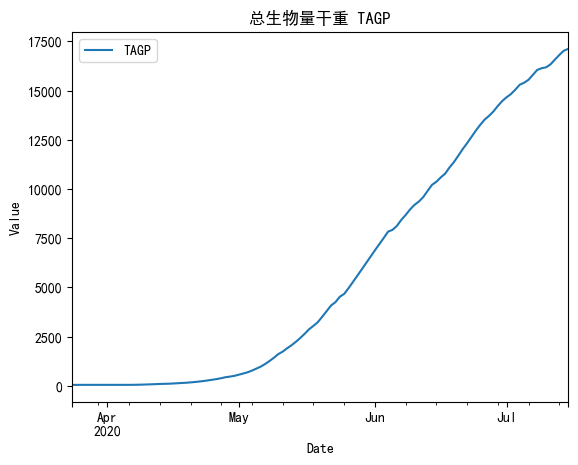

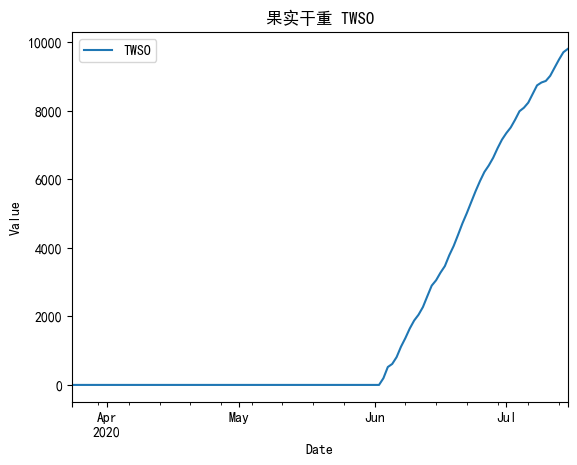

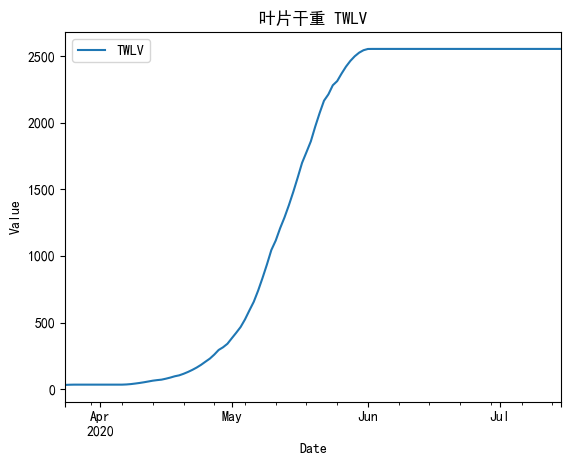

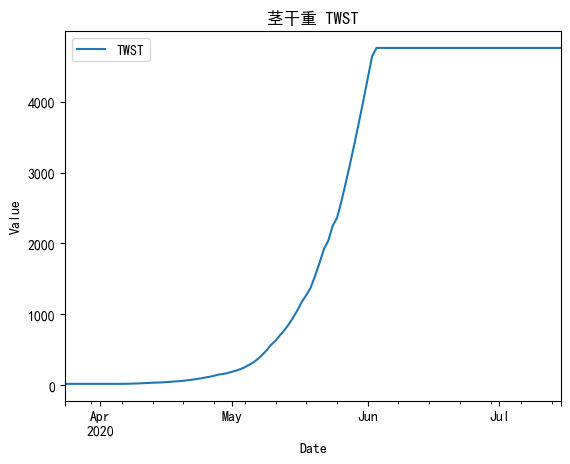

In [18]:
import pcse
# from pcse.base import ParameterProvider
from pcse.base import ParameterProvider  # 参数提供基类
from pcse.input import YAMLCropDataProvider
from pcse.models import Wofost73_WLP_CWB,Wofost81_WLP_CWB ,Wofost72_WLP_CWB
from pcse.input import WOFOST72SiteDataProvider
# from pcse.db import PCSE
from pcse.input import YAMLAgroManagementReader
# from pcse.timer import Timer
# from pcse.base import VariableKiosk
from pcse.util import DummySoilDataProvider  # 虚拟土壤数据提供器
from pcse.input import ExcelWeatherDataProvider  # 导入Excel天气数据提供者类


# from datetime import datetime
import yaml
# 导入Path类用于路径操作
from pathlib import Path
import configparser

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体为黑体，可根据实际情况替换为其他支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False
from datetime import datetime, timedelta

# 加载站点数据 CO2=360. Value for parameter SMFCF missing SMFCF=0.2
sitedata = WOFOST72SiteDataProvider(WAV=50, )

# 获取当前工作目录
this_dir = Path.cwd()  # 当前工作目录对象
data_dir = this_dir / "data"

# 加载作物参数 set_active_crop('wheat', 'Winter_wheat_101')
# cropdata = YAMLCropDataProvider()
cropdata = YAMLCropDataProvider(fpath=data_dir / "crops", force_reload=True)

# 创建YAMLCropDataProvider实例，用于读取和提供作物数据
# 参数fpath指定作物数据文件的位置，force_reload强制重新加载数据而非缓存

# cropdata.set_active_crop('wheat', 'Winter_wheat_101')

# 读取农业管理数据
# 使用yaml.safe_load解析YAML格式的字符串，创建农业管理事件序列
# 这里定义了一个在2020年1月1日的事件，包括作物日历和事件（TimedEvents和StateEvents）的配置
agro = yaml.safe_load("""
- 2020-01-01:
    CropCalendar:
        crop_name: 'wheat'
        variety_name: 'Winter_wheat_101'
        crop_start_date: 2020-03-12
        crop_start_type: emergence
        crop_end_date: null
        crop_end_type: maturity
        max_duration: 300
    TimedEvents: null
    StateEvents: null
""")



# 构建数据目录路径
agro_dir = this_dir / "data"/ "agro"  # 将当前目录与"data"子目录组合成完整路径

conf_dir = this_dir / "conf"  # 将当前目录与"data"子目录组合成完整路径
# 使用给定的参数值运行模型

# 设定天气数据目录

weather_dir = data_dir / "meteo"  # 使用data_dir路径下的"meteo"目录作为天气数据存储位置

# 指定天气文件名
weather_fname = weather_dir / "example_weather.xlsx"  # 在weather_dir下指定名为"example_weather.xlsx"的天气数据文件

# 实例化ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider(weather_fname)
# 读取配置文件
# config.read(config_file_path)
# print(str(content))
# 将字符串日期转换为datetime对象
start_date = datetime(2020, 3, 31)
end_date = datetime(2020, 7, 15)
# wdp=
# 创建DummySoilDataProvider实例，可能用于提供默认或示例土壤数据
soild = DummySoilDataProvider()
# 设置参数提供器 ParameterProvider
params = ParameterProvider(cropdata=cropdata, soildata=soild,sitedata=sitedata)
# 使用给定的参数值运行模型
conf = str(Path.cwd() / "conf" / "Wofost72_WLP_FD _ Water.conf")
wofost = Wofost72_WLP_CWB(params, wdp, agro, config=conf)
# Wofost81_WLP_CWB 参数与 Wofost72_WLP_CWB 和 Wofost73_WLP_CWB是不同的 
# wofost = Wofost81_WLP_CWB(params, wdp, agro, config=conf)

wofost.run_till(end_date)
# wofost.run_till_terminate()
# 运行模型直至终止
# wofost.run_till_terminate()  # 运行模型直到达到停止条件
df = pd.DataFrame(wofost.get_output())
df.index = pd.to_datetime(df.day)
# print("df=",df)
# 调用DataFrame对象df的head方法，获取并显示数据框的前5行数据，用于快速查看数据的大致结构和前几行的具体数值情况
# df.head(5)
print("df=",df.head())
#
df['day'] = pd.to_datetime(df['day'])

# 设置开始和结束日期
start_date = start_date- timedelta(days=7)
end_date = end_date + timedelta(days=7)

# 筛选指定日期范围内的数据
df_filtered = df[(df['day'] >= start_date) & (df['day'] < end_date)]

# 绘图  
ax = df_filtered.plot(x='day', y='LAI', title="叶面积指数 LAI", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='SM', title="土壤含水量 SM", ylabel="Value", xlabel="Date")
# ax = df_filtered.plot(x='day', y='IRRIG', title="灌水量 IRRIG", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='TOTIRR', title="总灌溉量 TOTIRR", ylabel="Value", xlabel="Date")
# ax = df_filtered.plot(x='day', y='WBOT', title="渗漏量 WBOT", ylabel="Value", xlabel="Date")
# WBOT, Water below maximum rootable depth and unavailable for plant growth.

ax = df_filtered.plot(x='day', y='TRA', title="作物蒸腾（耗水量） TRA", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='RD', title="根系深度 RD", ylabel="Value", xlabel="Date")

ax = df_filtered.plot(x='day', y='DVS', title="生长阶段 DVS", ylabel="Value", xlabel="Date")

ax = df_filtered.plot(x='day', y='TAGP', title="总生物量干重 TAGP", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='TWSO', title="果实干重 TWSO", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='TWLV', title="叶片干重 TWLV", ylabel="Value", xlabel="Date")
ax = df_filtered.plot(x='day', y='TWST', title="茎干重 TWST", ylabel="Value", xlabel="Date")
# plt.show()
# fig = df.plot()
# 绘图结果会被存储在一个Figure对象fig中，后续可以对这个Figure对象进行进一步的操作，比如保存图片、设置图表的标题、坐标轴标签等。
# fig = df.plot()
# ax = df.LAI.plot(title="LAI", ylabel="Value",xlabel="Date")
